
<h1 style="color:blue;text-align: center;">PERCEPTRON</h1>

Perceptron is a single layer neural network used for learning a binary classifier using a threshold function. During training the weights and bias are initialized randomly and examples are then presented. These examples are weighted by the corresponding weights and bias to produce a weighted sum and then transformed through a threshold function to produce an output.

let define the weighted sum to be $V=\sum_{i}^{n}W^{T}X+b$ and the threshold function to be $F$. The threshold function classify an output as belonging to either the positive class (class A or 1) or the negative class (class B or 0) using the using the defined function below

$$F=\begin{cases} 1 \quad if \ \ V  \geq 0 \\ 0 \quad otherwise\end{cases}$$

<h1 style="color:blue;text-align: center;">MULTILAYER PERCEPTRON (Deep feedforward networks)</h1>

A multilayer perceptron (MLP) is a neural network composed of more than one perceptron. They are composed of an input layer, an, arbitrary number of hidden layers and output layer which are stacked on top of each other. An output from a layer serves as an imput for the next layer above it and in that order, until the model generate a output from the output layer. The output from the output layer serve as the predicted output by the model. MLP is defined as

$$ h_1 = \sigma(W_1\boldsymbol{x} + b_1) $$
$$ h_2 = \sigma(W_2\boldsymbol{h_1} + b_2) $$
$$ h_3 = \sigma(W_3\boldsymbol{h_2} + b_3) $$
$$...$$
$$ h_n = \sigma(W_n\boldsymbol{h_{n-1}} + b_n) $$
$$ \hat{y} = \phi (W_y \boldsymbol{h}_n + b_y)$$ $$OR$$
$$ \hat{y} = W_y \boldsymbol{h}_n + b_y$$

where $\sigma$ is some nonlinear activation functions. $\phi$ is also a nonlinear function which depends on the target variable. Note that each layer requires its own set of parameters and all these parameters are updated during training. For each layer the model first calculate its value by first applying a linear function before applying an element-wise nonlinear activation function. 



<b style="color:red">"The final layer of a feedforward network is called the output layer. During neural network training, we drive f(x) to match f∗(x). The training data provides us with noisy, approximate examples of f ∗(x) evaluated at different training points. Each example x is accompanied by a label y ≈ f ∗(x). The training examples specify directly what the output layer must do at each point x; it must produce a value that is close to y. The behavior of the other layers is not directly specified by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data does not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of f∗. Because the training data does not show the desired output for each of these layers, these layers are called hidden layers. The dimensionality of these hidden layers determines the width of the model"</b>


<b>(source: From the book, Deep Learning by Ian Goodfellow,Yoshua Bengio and Aaron Courville Chapter 6 (Deep Feedforward Networks) page 169) </b>

<h1 style="background-color:DodgerBlue;"><img src="images/mlp.png" alt="Smiley face" style="float:right;width:400px;height:300px;">A multilayer perceptron with 4 inputs, a hidden layer with 4 hidden units and 2 outputs</h1>


<h1 style="color:blue;text-align: center;">Activation Functions</h1>

Activation functions are used to introduce non-linearity to the neural network without neural networks could do little to learn non-linear functions and as such play important roles in neural networks. A chosen activation function for a node is responsible for transforming the summed weighted input of that node and it determines the output of that node. These activation functions help the networks in predicting a desirable output based on the learned patterns within datasets by the parameters. Activation functions are also chosen for input-hidden layers and hidden-output layer and a primary considerations for choosing activation function the differentiability nature of the function since back-propagated used in updating model parameters requires the gradient of the activation function. There are different types of activation functions but we will only briefly survey some common activation functions.

<h1 style="color:blue;text-align: center;">Reactified Linear Unit (ReLU) Function</h1>

Relu has become the default activation function for many types of neural networks due to its simplicity of implementation, easier to train and often achieves better performance on a variety of predictive tasks. When apply to an output from a linear transformation yields a nonlinear transformation and this simple nonlinear transformation is defined to returns 0 if it receives a negative input (discards all negative elements) and if a positive value is received, returns the same the positive value, that is given the element $\textbf{z}$, the function is defined as the maximum of that element and 0.

$$Relu(z)=max(0,z)  $$



Using inputs X defined as
$$X=\left [\begin{array}{ccc}
0& 0 \\
0 & 1\\
2 &5 \\
4&-3
\end{array}\right ]$$
and a hidden layer h defined by
$$h=f(WX+b0)$$

where 
$f=Relu$
$$b0=\left[\begin{array}{ccc}
0\\
-1 
\end{array}\right]$$

$$W=\left [\begin{array}{ccc}
1 &5\\
3 &1
\end{array}\right]$$

and an output layer defined by

$$ O=wh+b1 $$
where
$$w=\left[\begin{array}{ccc}
2\\
3
\end{array}\right]$$
$$b1=\left[\begin{array}{ccc}
0\\
0 
\end{array}\right]$$

we want to compute the output

In [1]:
import numpy as np
import torch

In [2]:
b0=torch.Tensor([0,-1])
W=torch.Tensor([[1,5],[3,1]])
w=torch.Tensor([2,3])

<h1>transpose(input, dim0, dim1) </h1>
 
 dim0 (int): the first dimension to be transposed

dim1 (int): the second dimension to be transposed

In [3]:
x=torch.Tensor([[0,0,2,4],[0,1,5,-3]])
x=x.transpose(0,1)
x

tensor([[ 0.,  0.],
        [ 0.,  1.],
        [ 2.,  5.],
        [ 4., -3.]])

In [4]:
h=x@W+b0
h

tensor([[ 0., -1.],
        [ 3.,  0.],
        [17., 14.],
        [-5., 16.]])

In [5]:
h_relu=np.maximum(0,h)
h_relu

tensor([[ 0.,  0.],
        [ 3.,  0.],
        [17., 14.],
        [ 0., 16.]])

In [6]:
output=h_relu@w
output

tensor([ 0.,  6., 76., 48.])

In [7]:
from torch.autograd import Variable
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plot_activation(x_data,y_data,xlabel='x',ylabel='y'):
    plt.figure(figsize=(4,3))
    plt.plot(x_data.data.numpy(),y_data.data.numpy())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

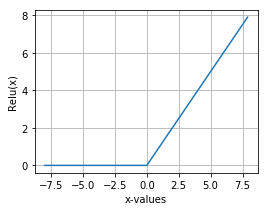

In [9]:
x=Variable(torch.arange(-8.0,8.0,0.1),requires_grad=True)
y=F.relu(x)
plot_activation(x,y,xlabel='x-values',ylabel='Relu(x)')

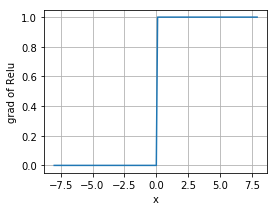

In [10]:
y.backward(torch.ones_like(x),retain_graph=True)
plot_activation(x, x.grad, 'x', 'grad of Relu')

# NOTE  
## Relu has many variants including 
$\bullet$LeakyReLU 

$\bullet$parameterized ReLU (pReLU)


<h1 style="color:blue;text-align: center;">Sigmoid Function</h1>

The sigmoid function transforms its inputs, which values lie in the domain R, to outputs that lie
on the interval (0; 1). The function has a lower bound of $\textbf{0}$ and an upper bound of $\textbf{1}$ which means that the function output values range is  [0,1] Because it squashes any input in the range (-inf, inf) to some value in the range (0, 1), the sigmoid function is often called a squashing function: 
The function is defined as

$$\boldsymbol{\sigma(z)}=\frac{1}{1+\exp(-z)} $$ 

C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


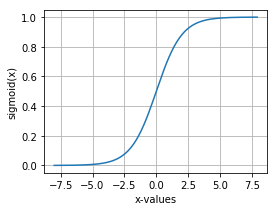

In [11]:
x=Variable(torch.arange(-8.0,8.0,0.1),requires_grad=True)
y=F.sigmoid(x)
plot_activation(x,y,xlabel='x-values',ylabel='sigmoid(x)')

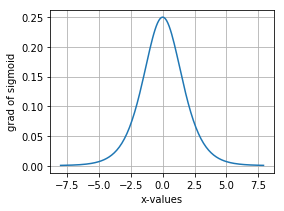

In [12]:
y.backward(torch.ones_like(x),retain_graph=True)
plot_activation(x,x.grad,xlabel='x-values',ylabel='grad of sigmoid')

<h1 style="color:blue;text-align: center;">Hyperbolic Tangent (Tanh) Function</h1>

The hyperbolic tangent function denoted as tanh(z) function is
a re-scaled version of the logistic sigmoid function, which is bounded below and above by [−1; 1] and
hence output values within the range of [−1; 1]. The function is defined as

$$tahn(z)=\frac{exp(z)-exp(-z)}{exp(z)+exp(-z)}=\frac{1-exp(-2z)}{1+exp(-2z)}$$

C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


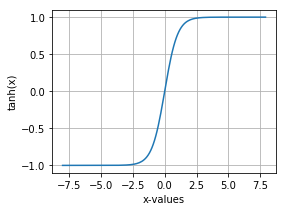

In [13]:
x=Variable(torch.arange(-8.0,8.0,0.1),requires_grad=True)
y=F.tanh(x)
plot_activation(x,y,xlabel='x-values',ylabel='tanh(x)')

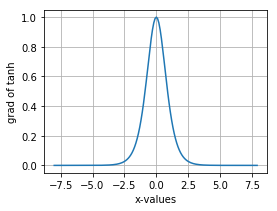

In [14]:
y.backward(torch.ones_like(x),retain_graph=True)
plot_activation(x,x.grad,xlabel='x-values',ylabel='grad of tanh')

# note
$$ tanh(x)+1=2sigmoid(2x)$$

In [15]:
np.round(np.tanh(1)+1,3)

1.762

In [16]:
def f(x):
    return 2/(1+np.exp(-2*x))
np.round(f(1),3)

1.762

<h1 style='text-align:center;'>Implementation of Multilayer Perceptron from Scratch using Softmax as the output activation function </h1>

<h1>importing the needed packages</h1>

In [1]:
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as f
from torch.utils.data import DataLoader,TensorDataset
import torch
import torch.utils.data as Data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
%matplotlib inline

# Loading the data

In [2]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor())

train_dataset=train_dataset.data.reshape([-1,784]).shape
test_dataset=test_dataset.data.reshape(-1,784).shape

In [3]:
batch_size=265
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

In [4]:
for x,y in train_loader:
    print(x.shape)
    break

torch.Size([265, 1, 28, 28])


<h1> Defining and initializing our model with the parameters  </h1>MODEL</h1>
we are defining our model to be 
$$ h_1 = \sigma(W_1\boldsymbol{x} + b_1) $$
$$ h_2 = \sigma(W_2\boldsymbol{h_1} + b_2) $$
$$ \hat{y} = softmax(W_3\boldsymbol{h}_2 + b_3)$$
where $\sigma$ is defined to be relu activation function


 MLP with two hidden layers each with 256 hidden units in the first layer,  100 hidden units in the second layer and since the target variable contain 10 categories we will set the number of output to 10

weight_scale = .01
num_inputs, num_outputs, num_hidden_1,num_hidden_2 = 784, 10, 256,100

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        # parameters of the first hidden layer
        self.w1=nn.Parameter(torch.rand(num_inputs,num_hidden_1,requires_grad=True)*weight_scale)
        self.b1=nn.Parameter(torch.zeros(num_hidden_1,requires_grad=True))
        
        # parameters of the  second hidden layer
        self.w2=nn.Parameter(torch.rand(num_hidden_1,num_hidden_2,requires_grad=True)*weight_scale)
        self.b2=nn.Parameter(torch.zeros(num_hidden_2,requires_grad=True))
        
        # parameters of the  third hidden layer
        self.w3=nn.Parameter(torch.rand(num_hidden_2,num_outputs,requires_grad=True)*weight_scale)
        self.b3=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
        
    def relu(self,s):
        a=torch.zeros_like(s)
        return torch.max(a,s)
    
    def softmax(self,z):
        exp_num=torch.exp(z)
        deno=torch.sum(exp_num,dim=1,keepdim=True)
        return exp_num/deno
        
    def forward(self,x):
        x=x.reshape(-1,784)
        h_1=self.relu(x@self.w1 +self.b1)
        h_2=self.relu(h_1@self.w2 +self.b2)
        out=h_2@self.w3 +self.b3
        logits=self.softmax(out)
        return logits

In [5]:
weight_scale = .01
num_inputs, num_outputs, num_hidden_1,num_hidden_2 = 784, 10, 256,100


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(784,256)
        self.linear2=nn.Linear(256,100)
        self.linear3=nn.Linear(100,10)
    def forward(self,x):
        x=x.reshape(-1,784)
        h_1=f.relu(self.linear1(x))
        h_2=f.relu(self.linear2(h_1))
        #h_3=f.relu(self.linear3(h_2))
        #probs=f.softmax(h_3)
        return self.linear3(h_2)

In [6]:
mlp=MLP()

In [8]:
optimizer=torch.optim.SGD(mlp.parameters(), lr=0.1)

In [10]:
def evaluate_accuracy(net,data_iterator):
    pred_correct,n  = 0,0
    for  data,label in data_iterator:
        data=data.reshape(-1,784)
        output=net(data)
        pred = output.argmax(dim=1)
        pred_correct += (pred==label).float().sum().item()
        return pred_correct/len(data)

In [11]:
evaluate_accuracy(mlp,test_loader)

0.12830188679245283

<h1>defining our loss function to be categorical cross entropy loss</h1>

In [13]:
loss=nn.CrossEntropyLoss()

# Training loop

In [15]:
num_epochs = 10
for epoch in range(num_epochs+1):
    test_acc,train_acc=0,0
    for X,y in train_loader:
        y_hat=mlp(X)
        l=loss(y_hat,y)
        optimizer.zero_grad() 
        l.backward() 
        optimizer.step() 
    acc_te=evaluate_accuracy(mlp,test_loader)
    acc_tr=evaluate_accuracy(mlp,train_loader)
    test_acc+=acc_te
    train_acc+=acc_tr
    print('epoch %d, loss %f,train acc %f,test acc %f'%(epoch,l,train_acc,test_acc))

epoch 0, loss 0.366002,train acc 0.898113,test acc 0.924528
epoch 1, loss 0.259787,train acc 0.943396,test acc 0.916981
epoch 2, loss 0.200525,train acc 0.954717,test acc 0.909434
epoch 3, loss 0.203040,train acc 0.935849,test acc 0.928302
epoch 4, loss 0.212847,train acc 0.958491,test acc 0.950943
epoch 5, loss 0.186630,train acc 0.943396,test acc 0.969811
epoch 6, loss 0.100806,train acc 0.977358,test acc 0.962264
epoch 7, loss 0.146771,train acc 0.966038,test acc 0.954717
epoch 8, loss 0.086980,train acc 0.973585,test acc 0.981132
epoch 9, loss 0.069046,train acc 0.981132,test acc 0.969811
epoch 10, loss 0.110185,train acc 0.962264,test acc 0.973585
